In [3]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Carregando o Dataset
covidData = pd.read_excel("../database/dados-com-covid.xlsx")
covidData.head()
#covidData['CLASSI_FIN'].value_counts()


,NU_NOTIFIC,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,...,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
0,315867989608,2020-03-19,12,2020-03-14,11,RN,II URSAP,1412,MOSSORO,240800,...,NaN,0,NaN,NaT,0,NaN,NaT,NaN,NaN,NaN
1,315868079985,2020-03-22,13,2020-03-16,12,RN,II URSAP,1412,MOSSORO,240800,...,NaN,0,NaN,NaT,0,NaN,NaT,NaN,NaN,NaN
2,315868835393,2020-04-05,15,2020-03-24,13,RN,II URSAP,1412,MOSSORO,240800,...,NaN,0,NaN,NaT,0,NaN,NaT,NaN,NaN,NaN
3,315868867496,2020-03-23,13,2020-03-19,12,RN,II URSAP,1412,MOSSORO,240800,...,NaN,0,NaN,NaT,0,NaN,NaT,NaN,NaN,NaN
4,315868876560,2020-03-23,13,2020-03-21,12,RN,II URSAP,1412,MOSSORO,240800,...,NaN,0,NaN,NaT,0,NaN,NaT,NaN,NaN,NaN


# Visualizando Dados (Com/Sem Covid)

In [27]:
attributes = ["FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", "SATURACAO","DIARREIA","VOMITO"]
newCovidData = covidData[attributes]
newCovidData

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO
0,1,1,1,1,1,1,2,2
1,1,1,1,1,1,1,2,2
2,1,1,2,1,1,1,1,2
3,1,1,2,1,1,1,2,2
4,1,1,2,1,1,1,2,2
...,...,...,...,...,...,...,...,...
769,2,1,2,1,1,1,2,2
770,1,2,2,2,1,1,1,2
771,1,1,2,1,1,1,2,2
772,2,2,2,1,1,1,2,2


In [28]:
newCovidData.replace(1, 'Sim', inplace = True)
newCovidData.replace(2, 'Nao', inplace = True)
newCovidData.shape

C:\Users\walla\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


(774, 8)

In [29]:
# Sem covid - 372
# Com covid - 774
# Total - 774

febre = len(newCovidData.FEBRE[newCovidData.FEBRE == "Sim"])
tosse = len(newCovidData.TOSSE[newCovidData.TOSSE == "Sim"])
garganta = len(newCovidData.GARGANTA[newCovidData.GARGANTA == "Sim"])
dispneia = len(newCovidData.DISPNEIA[newCovidData.DISPNEIA == "Sim"])
respiracao = len(newCovidData.DESC_RESP[newCovidData.DESC_RESP == "Sim"])
saturacao = len(newCovidData.SATURACAO[newCovidData.SATURACAO == "Sim"])
diarreia = len(newCovidData.DIARREIA[newCovidData.DIARREIA == "Sim"])
vomito = len(newCovidData.VOMITO[newCovidData.VOMITO == "Sim"])

termos = ['Febre', 'Tosse', 'Garganta', 'Dispneia', 'Respiração', 'Saturação', 'Diarreia', 'Vômito']
valores = [febre, tosse, garganta, dispneia, respiracao, saturacao, diarreia, vomito]

valores

[516, 574, 136, 647, 604, 523, 108, 69]

In [30]:
# Tamanho do vetor
total = np.array([774])

# Se quiser em 100%, mude de 1 -> 100
porcento = np.array([1])

novosValores = (valores / total)
novosValores = (novosValores * porcento)
novosValores

array([0.66666667, 0.74160207, 0.17571059, 0.83591731, 0.78036176,
       0.67571059, 0.13953488, 0.08914729])

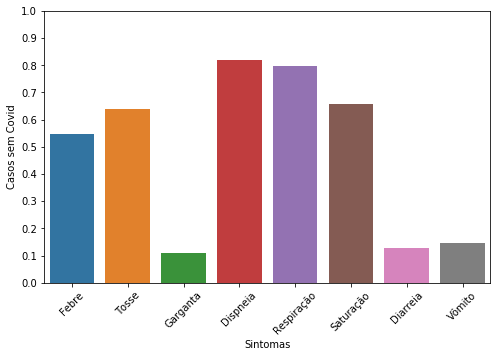

In [22]:
# Gerando o Gráfico de Barras
termos = ['Febre', 'Tosse', 'Garganta', 'Dispneia', 'Respiração', 'Saturação', 'Diarreia', 'Vômito']

#valores ou novosValores
valores = [febre, tosse, garganta, dispneia, respiracao, saturacao, diarreia, vomito]

fig, ax = plt.subplots()

sns.barplot(x=termos, y=novosValores, ax=ax)
plt.xlabel('Sintomas')
plt.ylabel('Casos sem Covid')

plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
#plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xticks(rotation=45)
ax.tick_params(labelsize=10)
fig = plt.gcf()
plt.gcf().set_size_inches(8, 5)
plt.show()
#fig.savefig('sintomas-confirmados.png', format='png')

In [2]:
# Comparativo entre os dados

termos = ['Febre', 'Tosse', 'Garganta', 'Dispneia', 'Respiração', 'Saturação', 'Diarreia', 'Vômito']
sem_covid_vector = [0.54569892, 0.63978495, 0.11021505, 0.81989247, 0.79569892, 0.65860215, 0.12634409, 0.14516129]
com_covid_vector = [0.66666667, 0.74160207, 0.17571059, 0.83591731, 0.78036176, 0.67571059, 0.13953488, 0.08914729]


In [6]:
ind = np.arange(len(termos))

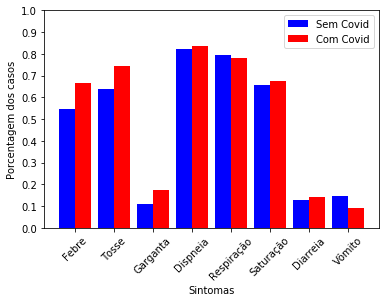

In [13]:
# Gerando o Gráfico
fig, ax = plt.subplots()

width = 0.4
                          
plt.bar(ind, sem_covid_vector, width, color = 'blue', label = 'Sem Covid')
plt.bar(ind + width, com_covid_vector, width, color = 'red', label = 'Com Covid')

#sns.barplot(x=termos, y=sem_covid_vector, ax=ax)
#sns.barplot(x=termos, y=com_covid_vector, ax=ax)

plt.xlabel('Sintomas')
plt.ylabel('Porcentagem dos casos')

plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
#plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.xticks(rotation=45)
location = ind+width/2
labels= termos
plt.xticks(location, labels)
plt.legend()
                
#ax.tick_params(labelsize=10)
#fig = plt.gcf()
plt.show()
fig.savefig('comparativo_casos.png', format='png')

# Nova visualização

In [ ]:
covidData.shape

(709, 29)

In [5]:
#Verificando a quantidade de grupos de pessoas
termos = ['Crianca', 'Jovem', 'Adulto_1', 'Adulto_2', 'Adulto_3', 'Idoso_1', 'Idoso_2', 'Idoso_3']
valores = [3, 2, 26, 115, 184, 191, 157, 31]

faixa_etaria = covidData['FAIXA_IDADE'].value_counts()
faixa_etaria


NameError: name 'covidData' is not defined

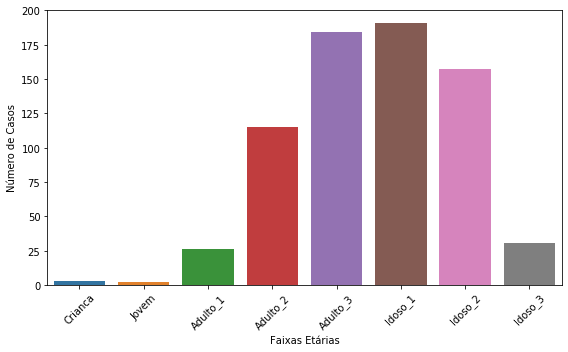

In [6]:
#Verificando a quantidade de grupos de pessoas
fig, ax = plt.subplots()

#criando o gráfico de barras 
sns.barplot(x=termos, y=valores, ax=ax)
plt.xlabel('Faixas Etárias')
plt.ylabel('Número de Casos')
ax.tick_params(labelsize=10)

#ax.set_title("Pessoas por Faixa-etária", fontdict={'fontsize':15})

#ax.set_xlabel('Anos', fontdict={'fontsize':14})

#ax.set_ylabel('Quantidades', fontdict={'fontsize':14})

#otimizar espaço da figure

plt.xticks(rotation=45)
ax.tick_params(labelsize=10)
plt.gcf().set_size_inches(8, 5)

fig.tight_layout();
fig = plt.gcf()
plt.show()
fig.savefig('casos-faixaetaria.png', format='png')

In [ ]:
# Distribuição por gênero
covid_info = covidData.drop(covidData[covidData.FAIXA_IDADE != "IDOSO3"].index)
new_info = covid_info.drop(covid_info[covid_info.EVOLUCAO != 2].index)
new_info['CS_SEXO'].value_counts()

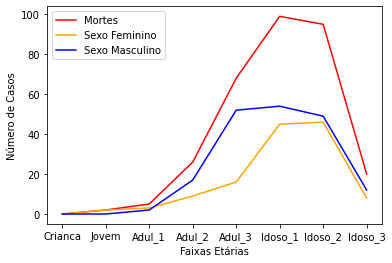

In [ ]:
# Gerando o Gráfico por gênero
# Mortes
plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0, 2, 5, 26, 68, 99, 95, 20], color = 'red')

# Feminino - 0 
plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0,2,3,9,16,45,46,8], color = 'orange')

# Masculino - 1 Maior
plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0,0,2,17,52,54,49,12], color = 'blue')

plt.legend(['Mortes', 'Sexo Feminino', 'Sexo Masculino'])
plt.xlabel('Faixas Etárias')
plt.ylabel('Número de Casos')
fig = plt.gcf()
plt.show()
fig.savefig('casos-genero.png', format='png')

In [ ]:
# Visualizando a quantidade de pessoas 
#1- Curado , 2- óbito
# termos = ['Crianca', 'Jovem', 'Adulto_1', 'Adulto_2', 'Adulto_3', 'Idoso_1', 'Idoso_2', 'Idoso_3']
# curado = [3, 0, 21, 89, 116, 99, 95, 20]
# obito = [0, 2, 5, 26, 68, 92, 62, 11]

covid_crianca = covidData.drop(covidData[covidData.FAIXA_IDADE != "IDOSO3"].index)
covid_crianca['EVOLUCAO'].value_counts()


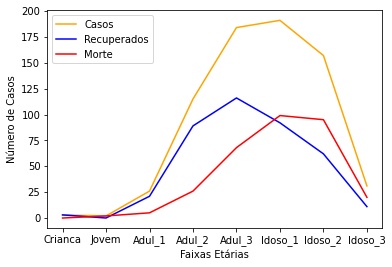

In [ ]:
# Casos
plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [3, 2, 26, 115, 184, 191, 157, 31], color = 'orange')

# Curados
plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [3, 0, 21, 89, 116, 92, 62, 11], color = 'blue')

# Mortes
plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0, 2, 5, 26, 68, 99, 95, 20], color = 'red')


plt.legend(['Casos', 'Recuperados', 'Morte'])

plt.xlabel('Faixas Etárias')
plt.ylabel('Número de Casos')
fig = plt.gcf()
plt.show()
fig.savefig('casos-evolucao.png', format='png')

In [ ]:
# Gráfico - Acurácia dos Algoritmos - Precisa de Atualização
plt.plot(['AD', 'K-NN', 'MLP', 'SVM', 'NB'], 
         [77, 74, 78, 76, 70], color = 'orange')

In [ ]:
# Gráfico - Óbitos - Possuia Comorbidade
covid_info = covidData.drop(covidData[covidData.FAIXA_IDADE != "IDOSO3"].index)
new_info = covid_info.drop(covid_info[covid_info.EVOLUCAO != 2].index)
new_info['FATOR_RISC'].value_counts()



Sim    14
Nao     6
Name: FATOR_RISC, dtype: int64

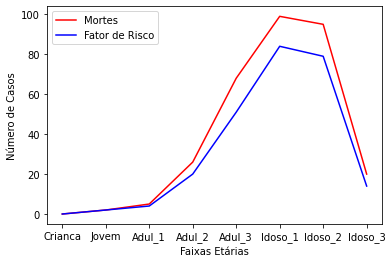

In [ ]:
# Gráfico - Óbitos - Possuia Comorbidade
plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0, 2, 5, 26, 68, 99, 95, 20], color = 'red')

plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0, 2, 4, 20, 51, 84, 79, 14], color = 'blue')

plt.legend(['Mortes', 'Fator de Risco'])
plt.xlabel('Faixas Etárias')
plt.ylabel('Número de Casos')

fig = plt.gcf()
plt.show()
fig.savefig('mortes-fatrisco.png', format='png')

In [ ]:
# G3 - Número de óbtidos que foram internados
# termos = ['Crianca', 'Jovem', 'Adulto_1', 'Adulto_2', 'Adulto_3', 'Idoso_1', 'Idoso_2', 'Idoso_3']

covid_info = covidData.drop(covidData[covidData.FAIXA_IDADE != "IDOSO1"].index)
new_info = covid_info.drop(covid_info[covid_info.EVOLUCAO != 2].index)
new_info['UTI'].value_counts()

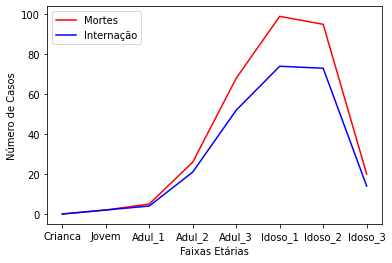

In [ ]:
# Plotando o G3

plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0, 2, 5, 26, 68, 99, 95, 20], color = 'red')

plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0, 2, 4, 21, 52, 74, 73, 14], color = 'blue')

plt.legend(['Mortes', 'Internação'])
plt.xlabel('Faixas Etárias')
plt.ylabel('Número de Casos')
fig = plt.gcf()
plt.show()
fig.savefig('mortes-internacao.png', format='png')

In [ ]:
# G4 - Número de óbtidos que foram internados
# termos = ['Crianca', 'Jovem', 'Adulto_1', 'Adulto_2', 'Adulto_3', 'Idoso_1', 'Idoso_2', 'Idoso_3']

covid_info = covidData.drop(covidData[covidData.FAIXA_IDADE != "IDOSO3"].index)
new_info = covid_info.drop(covid_info[covid_info.EVOLUCAO != 2].index)
new_info['SUPORT_VEN'].value_counts()

In [ ]:
# Plotando o G4

plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0, 2, 5, 26, 68, 99, 95, 20], color = 'red')

plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0, 1, 5, 22, 60, 88, 88, 18], color = 'blue')

plt.legend(['Mortes', 'Uso de Respirador'])

plt.xlabel('Faixas Etárias')
plt.ylabel('Número de Casos')
fig = plt.gcf()
plt.show()
fig.savefig('mortes-respirador.png', format='png')


In [ ]:
# G5 - Testando - Febre - 
# termos = ['Crianca', 'Jovem', 'Adulto_1', 'Adulto_2', 'Adulto_3', 'Idoso_1', 'Idoso_2', 'Idoso_3']

covid_info = covidData.drop(covidData[covidData.FAIXA_IDADE != 'JOVEM'].index)
new_info = covid_info.drop(covid_info[covid_info.EVOLUCAO != 2].index)
new_info['TOSSE'].value_counts()

Sim         1
Ignorada    1
Name: TOSSE, dtype: int64

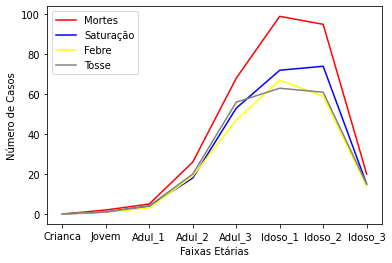

In [ ]:
# G5 - Testando Febre
plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0, 2, 5, 26, 68, 99, 95, 20], color = 'red')

# Saturacao
plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0, 1, 4, 18, 53, 72, 74, 15], color = 'blue')

# Febre
plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0, 1, 3, 19, 47, 67, 59, 14], color = 'yellow')

# Tosse
plt.plot(['Crianca', 'Jovem', 'Adul_1', 'Adul_2', 'Adul_3', 'Idoso_1', 'Idoso_2', 'Idoso_3'], 
         [0, 1, 4, 20, 56, 63, 61, 15], color = 'gray')

plt.legend(['Mortes', 'Saturação', 'Febre', 'Tosse'])

plt.xlabel('Faixas Etárias')
plt.ylabel('Número de Casos')
fig = plt.gcf()
plt.show()
fig.savefig('mortes-sintomas.png', format='png')